In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [59]:
#Reading the file 
deeds = pd.read_excel("ss.xlsx")

Let's look at the data 

In [60]:
deeds.head()

,Reg.No,Reg.Date,First Party,Unnamed: 3,Second Party,Unnamed: 5,Property Address,Area,Deed Type,Property Type
0,7,2019-01-01 00:00:00,S C KHURANA,NaN,AJAY VISHAL,NaN,"House No. B-3/93,Safdarjung Enclave",100 Sq. Meter,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
1,11,2019-01-02 00:00:00,RAJESH KUMAR BHASIN,NaN,MIN HO KIM,NaN,"House No. A1/161 FF,Safdarjung Enclave",2050 Sq. Feet,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
2,20,2019-01-02 00:00:00,SANDEEP ARVIND,NaN,RADHALAKSHMI R,NaN,"House No. A-1/257 F/F REAR PORTION,Safdarjung ...",1000 Sq. Feet,"LEASE,LEASE UPTO 5 YEARS",Residential
3,36,2019-01-03 00:00:00,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,NaN,KANUKPRIYA GULATI,NaN,"House No. FF PROP NO A-1/62,Safdarjung Enclave",443 Sq. Yard,"SALE,SALE WITHIN MC AREA",Residential
4,39,2019-01-03 00:00:00,VISHAL JAIRATH,NaN,ITHIKIA HEALTH SCIENCES LLP THRU CHAND RATAN D...,NaN,"House No. ENTIRE BASEMENT AND ENTIRE GF, Road ...",2000 Sq. Meter,"LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial


As you noticed there are two columns extra here, so we need to remove them.

In [61]:
deeds.columns

Index(['Reg.No', 'Reg.Date', 'First Party', 'Unnamed: 3', 'Second Party',
       'Unnamed: 5', 'Property Address', 'Area', 'Deed Type', 'Property Type'],
      dtype='object')

In [62]:
deeds.drop(['Unnamed: 3','Unnamed: 5'],axis = 1, inplace = True)

In [63]:
deeds.head()

,Reg.No,Reg.Date,First Party,Second Party,Property Address,Area,Deed Type,Property Type
0,7,2019-01-01 00:00:00,S C KHURANA,AJAY VISHAL,"House No. B-3/93,Safdarjung Enclave",100 Sq. Meter,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
1,11,2019-01-02 00:00:00,RAJESH KUMAR BHASIN,MIN HO KIM,"House No. A1/161 FF,Safdarjung Enclave",2050 Sq. Feet,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
2,20,2019-01-02 00:00:00,SANDEEP ARVIND,RADHALAKSHMI R,"House No. A-1/257 F/F REAR PORTION,Safdarjung ...",1000 Sq. Feet,"LEASE,LEASE UPTO 5 YEARS",Residential
3,36,2019-01-03 00:00:00,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,KANUKPRIYA GULATI,"House No. FF PROP NO A-1/62,Safdarjung Enclave",443 Sq. Yard,"SALE,SALE WITHIN MC AREA",Residential
4,39,2019-01-03 00:00:00,VISHAL JAIRATH,ITHIKIA HEALTH SCIENCES LLP THRU CHAND RATAN D...,"House No. ENTIRE BASEMENT AND ENTIRE GF, Road ...",2000 Sq. Meter,"LEASE,LEASE WITH SECURITY UPTO 10 YEARS",Commercial


In [64]:
#extracting the data of yard feet and meters to convert into a common metric
deeds1 =deeds[deeds['Area'].str.contains("Yard")]
deeds2 =deeds[deeds['Area'].str.contains("Feet")]
deeds3 =deeds[deeds['Area'].str.contains("Meter")]

In [65]:
deeds1.head()

,Reg.No,Reg.Date,First Party,Second Party,Property Address,Area,Deed Type,Property Type
3,36,2019-01-03 00:00:00,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,KANUKPRIYA GULATI,"House No. FF PROP NO A-1/62,Safdarjung Enclave",443 Sq. Yard,"SALE,SALE WITHIN MC AREA",Residential
5,41,2019-01-03 00:00:00,TANUJ KAPUR,ANUJ BAHRI MALHOTRA,"House No. B-4/22 SAFDARJUNG ENCLAVE ND,Safdarj...",200 Sq. Yard,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential
7,58,2019-01-04 00:00:00,ANJALI BAHL,"SNEH LATA BHARGAV,KUNWAR VIKAS","House No. B-5/44,Safdarjung Enclave",74.665 Sq. Yard,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential
12,99,2019-01-07 00:00:00,"KIRAN GOEL,PUJA GUPTA","ANKUR SHRIVASTAVA,AKRITI KHARE","House No. B-3/20 FF,Safdarjung Enclave",100 Sq. Yard,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
15,159,2019-01-10 00:00:00,"RUCHIKA SHARMA,AMBIKA SINGH,MANIKA BHUSHAN",PRATIMA NAGAR,"House No. B-3/6,Safdarjung Enclave",295 Sq. Yard,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential


##### Conversion of area to follow one particular metric in here i converted square yard and square metres to square feet

In [66]:
deeds1['Area'] = deeds1['Area'].str.extract('(\d+)')
deeds2['Area'] = deeds2['Area'].str.extract('(\d+)')
deeds3['Area'] = deeds3['Area'].str.extract('(\d+)')

In [67]:
deeds1['Area'] = deeds1['Area'].astype(int)
deeds2['Area'] = deeds2['Area'].astype(int)
deeds3['Area'] = deeds3['Area'].astype(int)

In [68]:
deeds1.dtypes

Reg.No               int64
Reg.Date            object
First Party         object
Second Party        object
Property Address    object
Area                 int32
Deed Type           object
Property Type       object
dtype: object

In [69]:
#conversio into square feet
deeds1['Area'] = deeds1['Area']*9
deeds3['Area'] = deeds3['Area']*10.76

In [70]:
#lets put together the data
deeds= pd.concat([deeds1, deeds2,deeds3], ignore_index=True)

In [71]:
deeds.head()

,Reg.No,Reg.Date,First Party,Second Party,Property Address,Area,Deed Type,Property Type
0,36,2019-01-03 00:00:00,LIKHA SAAYA THRU ATT MANOJ KUMAR GULATI,KANUKPRIYA GULATI,"House No. FF PROP NO A-1/62,Safdarjung Enclave",3987.0,"SALE,SALE WITHIN MC AREA",Residential
1,41,2019-01-03 00:00:00,TANUJ KAPUR,ANUJ BAHRI MALHOTRA,"House No. B-4/22 SAFDARJUNG ENCLAVE ND,Safdarj...",1800.0,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential
2,58,2019-01-04 00:00:00,ANJALI BAHL,"SNEH LATA BHARGAV,KUNWAR VIKAS","House No. B-5/44,Safdarjung Enclave",666.0,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential
3,99,2019-01-07 00:00:00,"KIRAN GOEL,PUJA GUPTA","ANKUR SHRIVASTAVA,AKRITI KHARE","House No. B-3/20 FF,Safdarjung Enclave",900.0,"LEASE,LEASE WITH SECURITY UPTO 5 YEARS",Residential
4,159,2019-01-10 00:00:00,"RUCHIKA SHARMA,AMBIKA SINGH,MANIKA BHUSHAN",PRATIMA NAGAR,"House No. B-3/6,Safdarjung Enclave",2655.0,"RELINQUISHMENT DEED,RELINQUISHMENT DEED",Residential


In [72]:
#Analysis of property type variable
deeds['Property Type'].value_counts()


Residential    1428
Commercial      112
Others            1
Name: Property Type, dtype: int64

In [73]:
deeds['Deed Type'].value_counts()

LEASE,LEASE WITH SECURITY UPTO 5 YEARS                       643
SALE,SALE WITHIN MC AREA                                     494
RELINQUISHMENT DEED,RELINQUISHMENT DEED                      140
GIFT,GIFT WITH IN MC AREA                                     61
LEASE,LEASE UPTO 5 YEARS                                      45
LEASE,LEASE WITH SECURITY UPTO 10 YEARS                       43
PARTITION,ADDITIONAL COPY OF PARTITION                        27
PARTITION,PARTITION                                           21
AGREEMENT,SALE AGREEMENT                                      17
RECTIFICATION DEED,RECTIFICATION DEED IMMOVABLE               12
RELEASE,RELEASE WITH CONSIDERATION                            10
LEASE,LEASE WITH SECURITY UPTO 20 YEARS                        6
LEASE,LEASE UPTO 10 YEARS                                      6
RELEASE,RELEASE WITHOUT CONSIDERATION                          3
SALE,SALE AFTER SALE AGREEMENT                                 2
LEASE,LEASE WITH SECURITY

In [74]:
deeds.dtypes

Reg.No                int64
Reg.Date             object
First Party          object
Second Party         object
Property Address     object
Area                float64
Deed Type            object
Property Type        object
dtype: object

Extraction of Year and month from the dates for visualization

In [75]:
deeds['Reg.Date'] = pd.to_datetime(deeds['Reg.Date'])
deeds['year'] = deeds['Reg.Date'].apply(lambda x: x.year)
deeds['month'] = deeds['Reg.Date'].apply(lambda x: x.month)

In [76]:
deeds.describe()

,Reg.No,Area,year,month
count,1541.000000,1541.000000,1541.000000,1541.000000
mean,2503.524984,1912.087969,2017.110318,6.256327
std,1698.450885,1689.748875,1.152424,3.538448
min,2.000000,0.000000,2015.000000,1.000000
25%,1027.000000,1125.000000,2016.000000,3.000000
50%,2275.000000,1796.920000,2017.000000,6.000000
75%,3902.000000,2239.000000,2018.000000,9.000000
max,6239.000000,29590.000000,2019.000000,12.000000


 Area has mean of 16532 square feets and maximum area and minimum area are 29590 and 0 square feets. we will find about the minimum area = 0.

In [78]:
#BAR CHART

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0,0.5,'No. of properties')

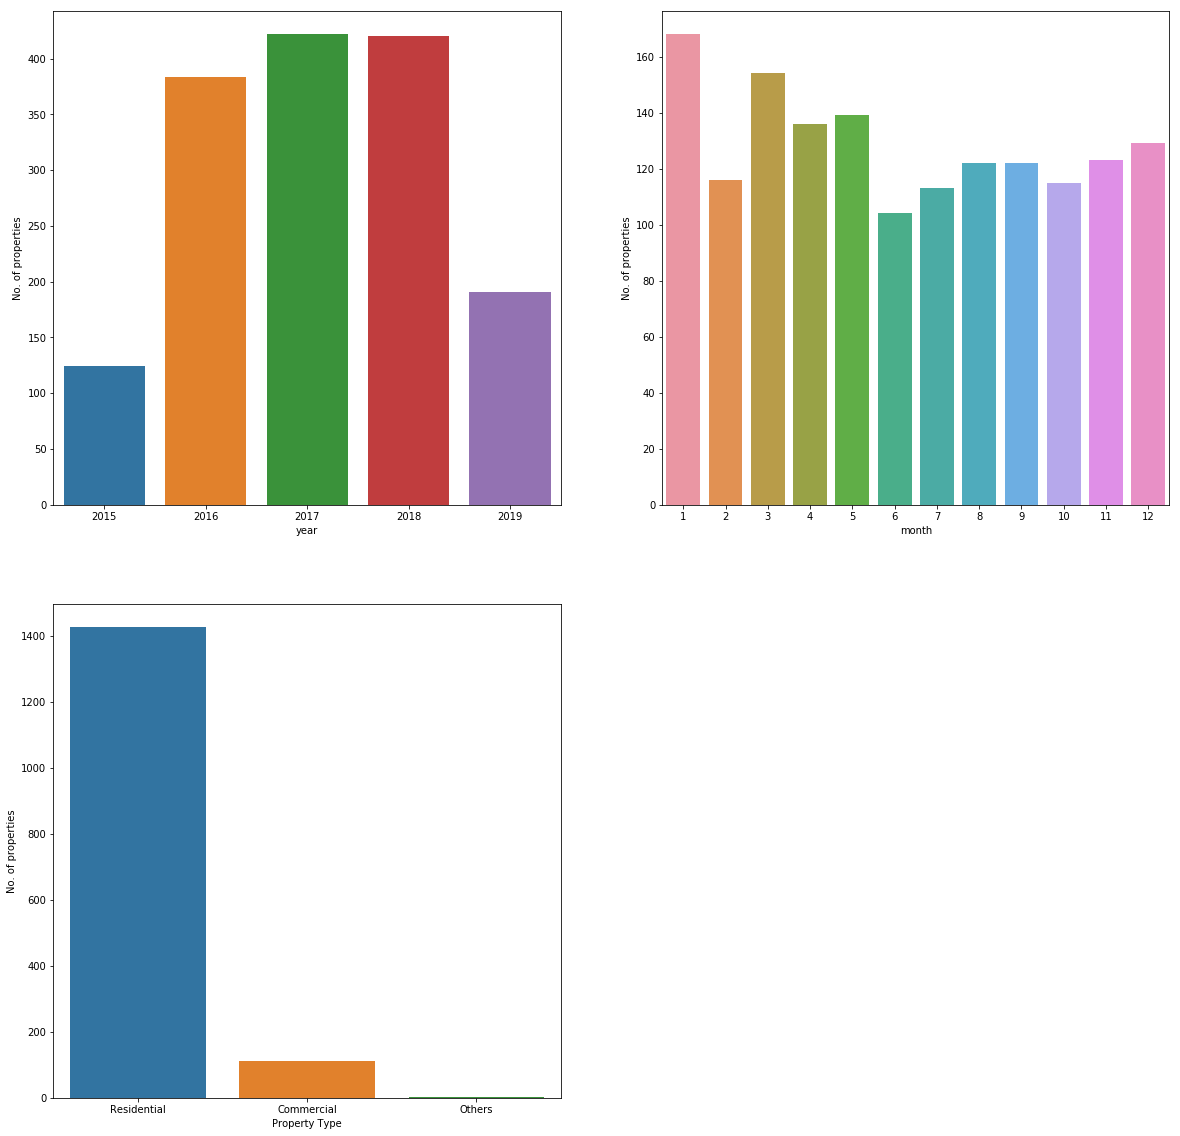

In [80]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(deeds['year'])
plt.ylabel('No. of properties')
plt.subplot(2,2,2)
sns.countplot(deeds['month'])
plt.ylabel('No. of properties')
plt.subplot(2,2,3)
sns.countplot(deeds['Property Type'])
plt.ylabel('No. of properties')

Text(0,0.5,'No. of properties')

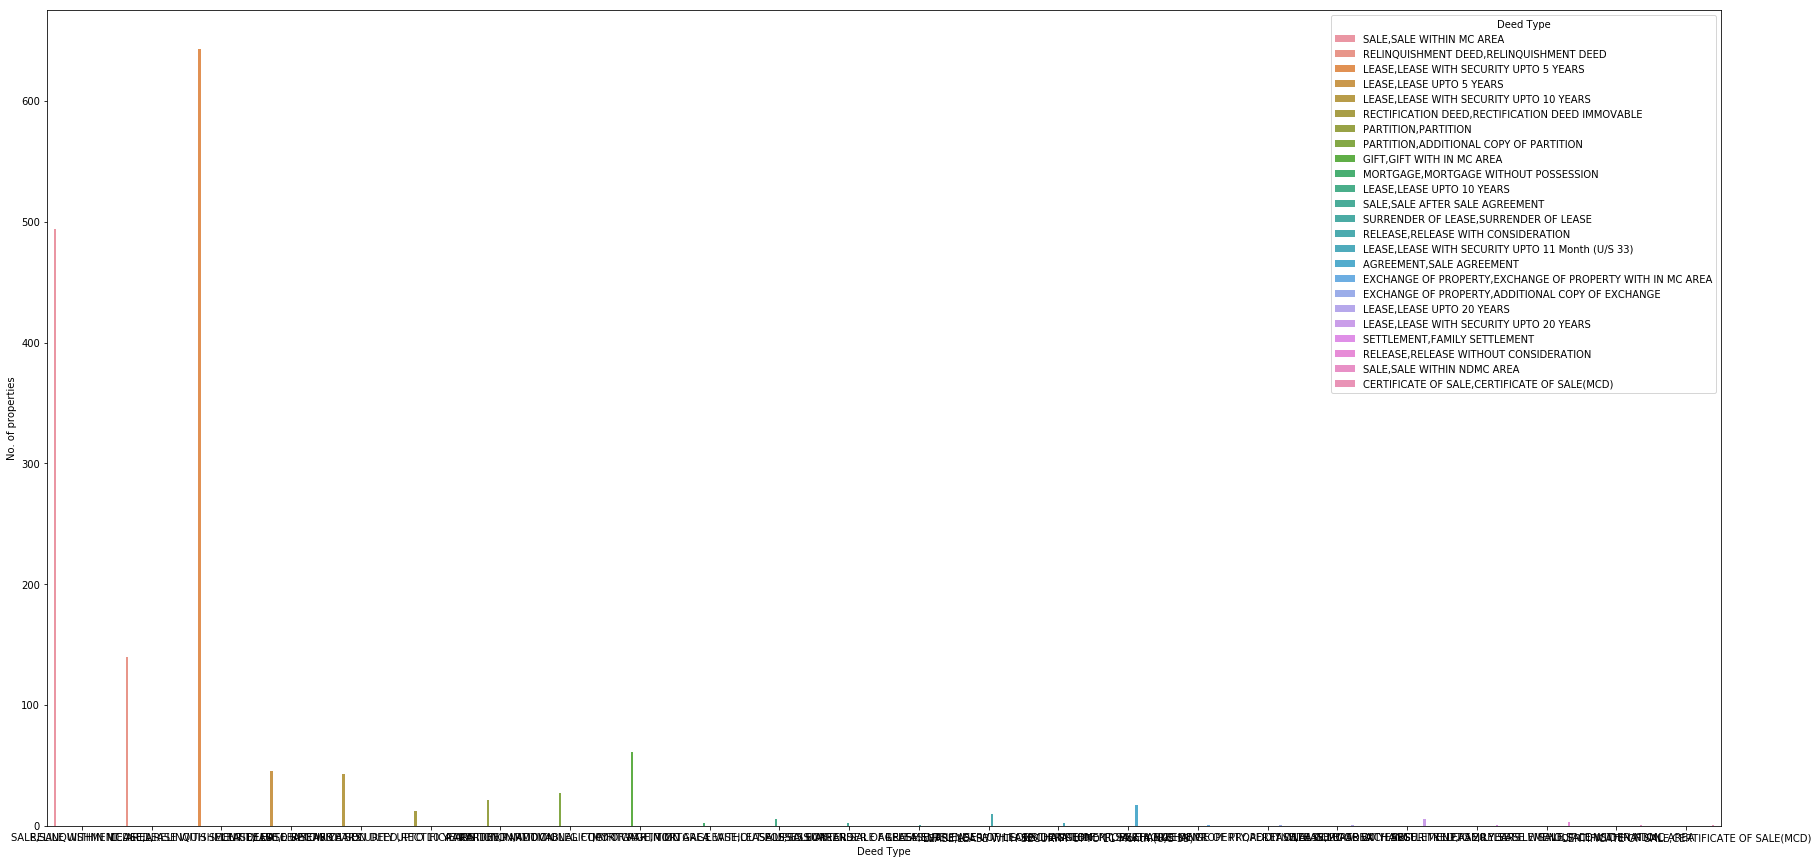

In [81]:
plt.figure(figsize = (30,15))
sns.countplot(deeds['Deed Type'],hue = deeds['Deed Type'])
plt.ylabel('No. of properties')

Here countplots are telling us are follows:
1. The first count plot is year vs count of properties and 2017 and 2018 have almost same number of property registered and its a increasing pattern.
2. The second countplot is month vs count of properties and here you can see that june is the month where less deeds are registered and january is the month when most deeds are registered. It also tells that first quarter of a year have most of the property registered
3. In third countplot residential properties have major share in safdarjung enclave
4. In here most of the property lies on upto security of five years

In [82]:
#Next we do scatterplots 

<Figure size 1440x1440 with 0 Axes>

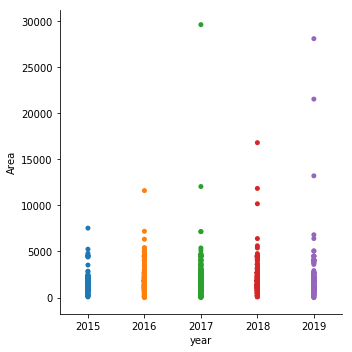

In [83]:
plt.figure(figsize = (20,20))
sns.catplot(x = 'year', y ='Area',jitter = False, data = deeds )

Here it seems like most of the properties lie in the 0 to 5000 square feet region or more precisely in 0 to 2000 square feet region lets find about is it commercial or residential

<Figure size 1440x1440 with 0 Axes>

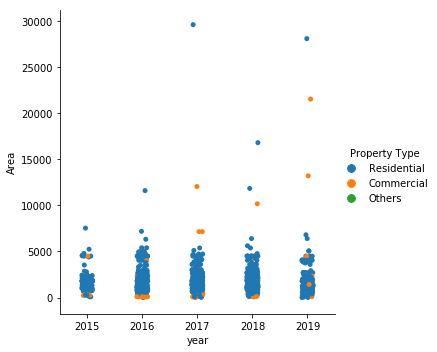

In [84]:
plt.figure(figsize = (20,20))
sns.catplot(x = 'year', y ='Area',hue = 'Property Type', data = deeds )

As you can see most of the properties are residential and some properties are too large to be consider as residential.lets find out to whom it belongs to.

<Figure size 1440x1440 with 0 Axes>

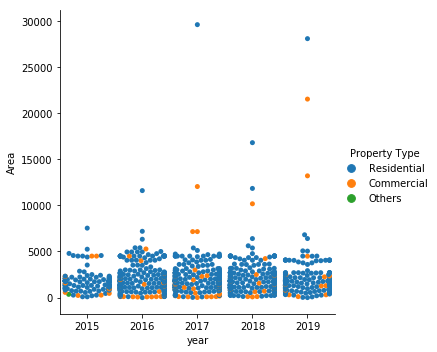

In [85]:
#we can make it more clear by swarm
plt.figure(figsize = (20,20))
sns.catplot(x = 'year', y ='Area',hue = 'Property Type',kind = 'swarm', data = deeds )

Here most of the properties lie in the residential segment, one property that has the highest area in 2019 let's check on that.

In [87]:
deeds[deeds['Area']>25000].index

Int64Index([824, 1203], dtype='int64')

In [89]:
deeds.iloc[1203,:]

Reg.No                                                1345
Reg.Date                               2017-12-04 00:00:00
First Party                             VINOD KUMAR DHANDA
Second Party            KONKAN RAILWAY CORPORATION LIMITAD
Property Address       House No. A-2/10,Safdarjung Enclave
Area                                                 29590
Deed Type           LEASE,LEASE WITH SECURITY UPTO 5 YEARS
Property Type                                  Residential
year                                                  2017
month                                                   12
Name: 1203, dtype: object

Its a company office of surangi services limited but why registered as Residential ? index - 803
Also konkan railways limited as second party for property of area 29950


<Figure size 2880x2880 with 0 Axes>

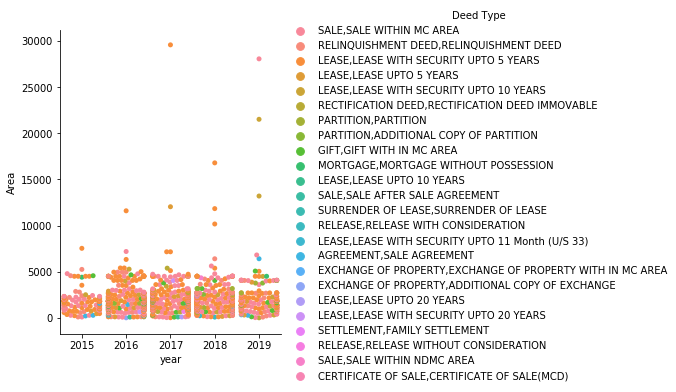

In [90]:
plt.figure(figsize = (40,40))
sns.catplot(x = 'year', y ='Area',hue = 'Deed Type',kind = 'swarm', data = deeds )

We can create same plots for months too and find a pattern there

Here its not much useful information from this plot

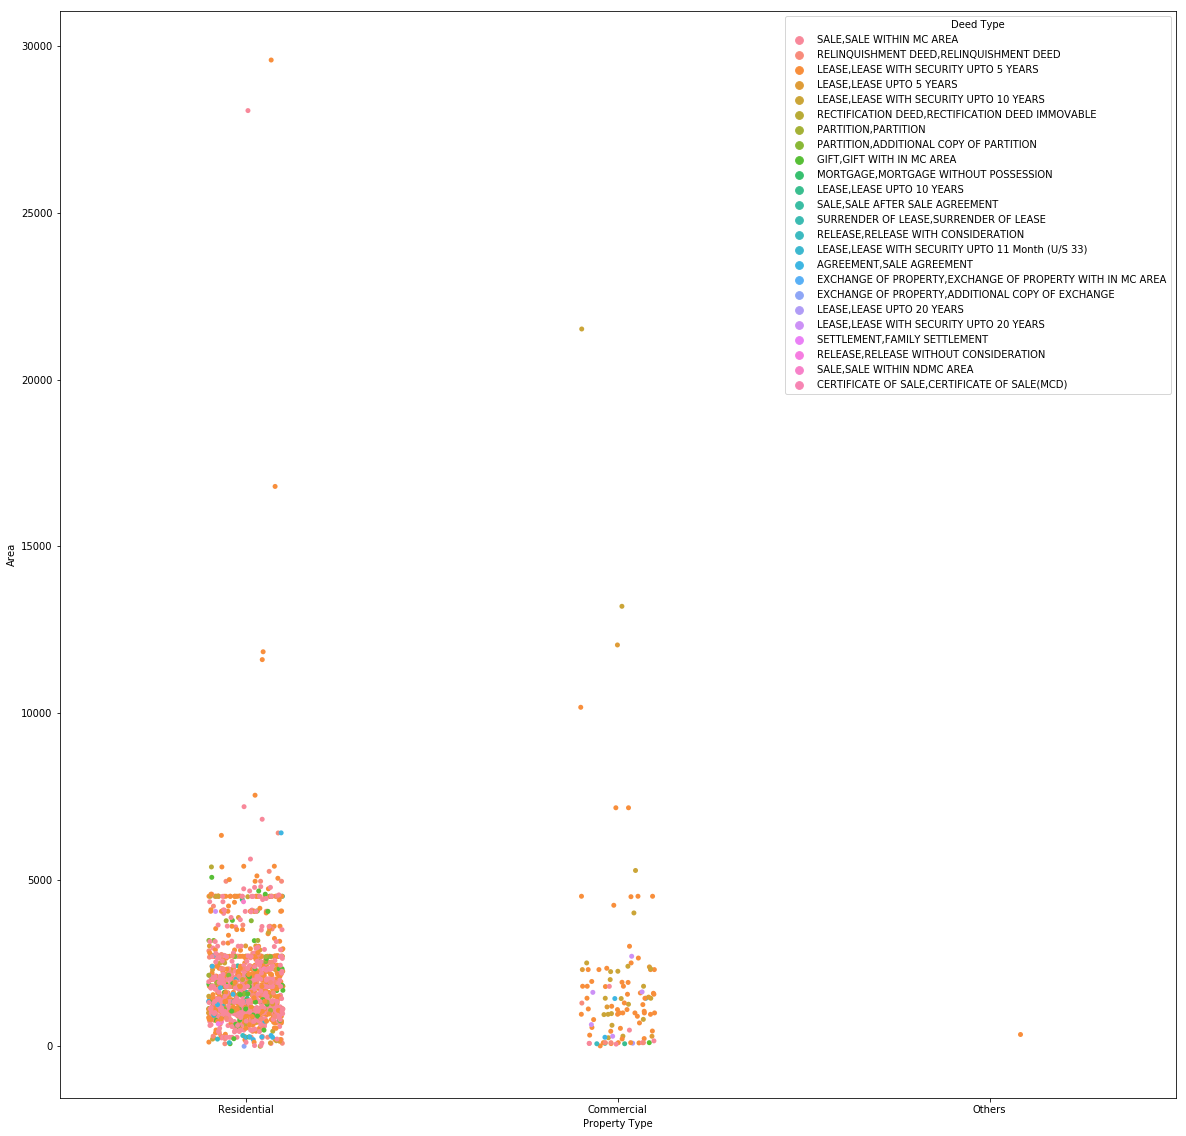

In [91]:
#lets try strip plot
plt.figure(figsize = (20,20))
sns.stripplot(x = 'Property Type', y ='Area', hue = 'Deed Type', data = deeds )

## Pair Plot
It generate co scatter and histogram plots with all the variables of continuous variables

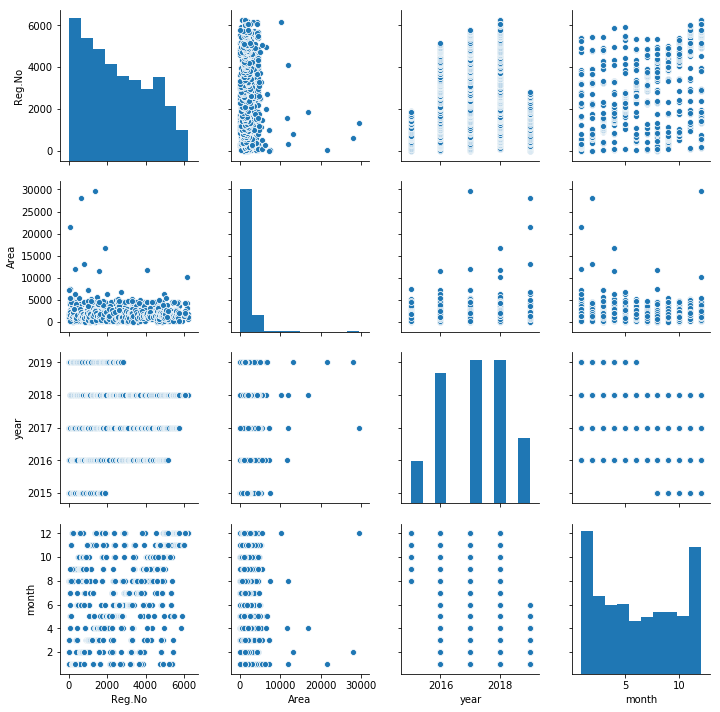

In [92]:
sns.pairplot(data = deeds)

##### Lets add one category in the pairplot to get a better look

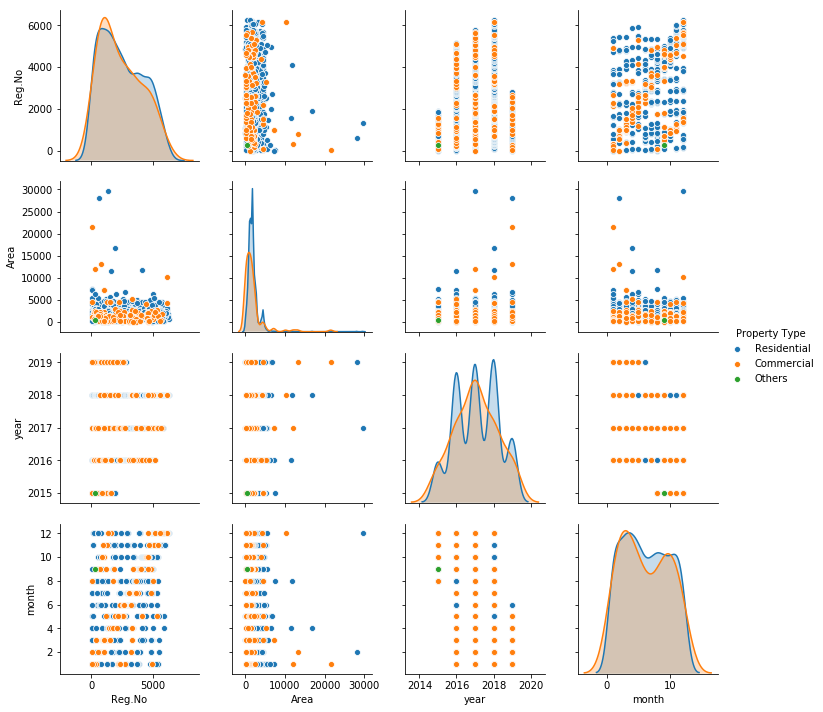

In [93]:
sns.pairplot(data = deeds,kind = 'scatter', hue = 'Property Type')

In this we can generate the same insight as above with just one plot

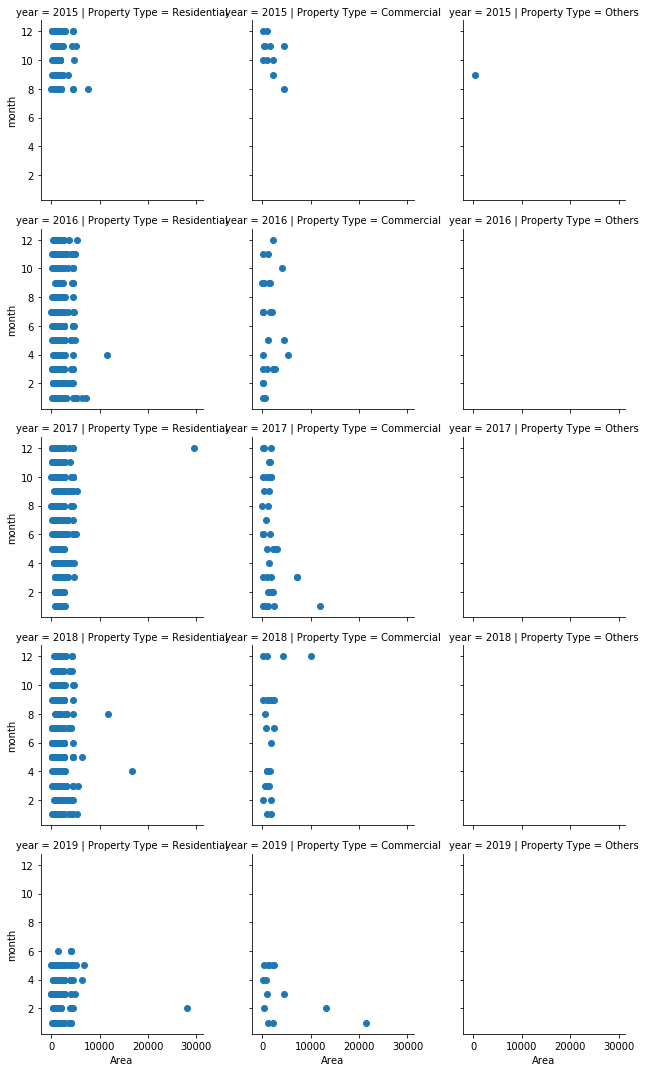

In [94]:
#facet grid to compare two categories
facet = sns.FacetGrid(data = deeds, col="Property Type",  row="year")
facet = facet.map(plt.scatter, "Area","month")

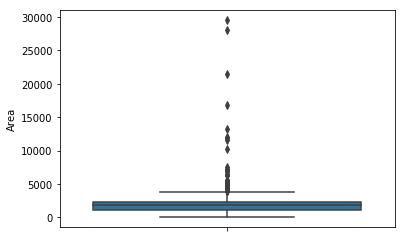

In [106]:
#Box plot - for finding where the most data lies for continuous variables only. In this data only one variable is numerical Area
sns.boxplot(deeds['Area'],orient = 'v')

As I stated in above plots that most of the properties lies between 2000-3000 range. There are some outliers which can be useful.

#### Lets move to some other statistics

Suppose from this dataset we have to predict whether a property is commercial or Residential, so its a classification problem. In order to find which features are best for that prediction we need to perform some additional test. although we could find essential features by using stepwise regression, factor analysis , ridge regression and PCA but correlation , chi square test and anova is as useful as they are.

In [95]:
# chi-square test is used to compare one categorical variable to another
from scipy.stats import chi2_contingency

In [96]:
cats = ['year','month','Deed Type']
for i in cats:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(deeds['Property Type'],deeds[i]))
    print(p)

year
0.03602752852573285
month
0.6077053161582425
Deed Type
2.0932984991280307e-28


As you can see above that month has the p value greator than 0.60 so its supporting null hypothesis so its independent of the property type

In [97]:
# analysis of variance test for continuous variable and categorical variable

In [98]:
import statsmodels.formula.api as smf
deeds.rename(columns = {'Property Type': 'Property_type'},inplace = True)

In [99]:
anova1 = smf.ols(formula = 'Area~ Property_type',data = deeds).fit()
print (anova1.f_pvalue)


0.6539077347087218


As you can see here The area is also not dependent on the property type.

I have some problems converting addresses to geo code as 40-50% addresses are getting failed in generating geocodes, i guess cleaning is required but i dont have time for this as i am actively working in a company, i hardly got 3-4 hours to make this ipython notebook. Plotting these geocodes and visualizing them we can plot them in folium and a new library plotly. we can also create a scatter plot for them to get a basic idea.I am trying scraping by beautiful soup and  
but there are so many tags to pick and when I remove the css of the page it shows that the first party have different row with address of the person embedded on it. also there are different pages for different year so its more amount of work, so i just copy and paste it into excel.